# Introduction - Exploratory Analysis

## Import libraries

In [110]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

# Loading the Dataset

In [111]:
folder_path = '../data/raw'
content = os.listdir(folder_path)
print(content)
file_path = '../data/raw/teams_data.json'

['teams_data.json']


In [112]:
df_raw = pd.read_json(file_path)

In [113]:
df_raw.head(10)

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,,0.388,292,278,14
2,Calgary Flames,1990,46,26,,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,,0.425,273,298,-25
5,Edmonton Oilers,1990,37,37,,0.463,272,272,0
6,Hartford Whalers,1990,31,38,,0.388,238,276,-38
7,Los Angeles Kings,1990,46,24,,0.575,340,254,86
8,Minnesota North Stars,1990,27,39,,0.338,256,266,-10
9,Montreal Canadiens,1990,39,30,,0.487,273,249,24


# Preliminary Data Transformation

## Standardizing Column Names


In [114]:
df = df_raw.rename(columns={
    'Team Name': 'team',
    'Year': 'season',
    'Wins': 'victories',
    'Losses': 'defeats',
    'OT Losses': 'overtime_defeats',
    'Win %': 'victory_percentage',
    'Goals For (GF)': 'scored_goals',
    'Goals Against (GA)': 'received_goals',
    '+ / -': 'goal_difference'   
})

In [115]:
df.head(10)

,team,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference
0,Boston Bruins,1990,44,24,,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,,0.388,292,278,14
2,Calgary Flames,1990,46,26,,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,,0.425,273,298,-25
5,Edmonton Oilers,1990,37,37,,0.463,272,272,0
6,Hartford Whalers,1990,31,38,,0.388,238,276,-38
7,Los Angeles Kings,1990,46,24,,0.575,340,254,86
8,Minnesota North Stars,1990,27,39,,0.338,256,266,-10
9,Montreal Canadiens,1990,39,30,,0.487,273,249,24


## Removing Empty Values

In [116]:
sorted_unique_values = sorted(df['overtime_defeats'].unique())
print(sorted_unique_values)

['', '0', '1', '10', '11', '12', '13', '14', '15', '16', '18', '2', '3', '4', '5', '6', '7', '8', '9']


### Overwriting Empty Values with 0

In [117]:
df.loc[df['overtime_defeats'] == "", 'overtime_defeats'] = 0

In [118]:
df['overtime_defeats'] = pd.to_numeric(df['overtime_defeats'], errors='coerce')
df['overtime_defeats'].describe()

count    582.000000
mean       4.589347
std        4.605402
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       18.000000
Name: overtime_defeats, dtype: float64

### Column Type Conversion

In [119]:
df['overtime_defeats'] = df['overtime_defeats'].astype(int)

In [120]:
sorted_unique_values = sorted(df['overtime_defeats'].unique())
print(sorted_unique_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18]


In [121]:
df.head(5)

,team,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference
0,Boston Bruins,1990,44,24,0,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,0,0.388,292,278,14
2,Calgary Flames,1990,46,26,0,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,0,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,0,0.425,273,298,-25


# Dataset Analysis

### Number of teams that participated in league matches

In [122]:
unique_values_teams = df['team'].unique()
unique_count_teams = df['team'].nunique()
print(f"Teams list:\n{unique_values_teams}")
print(f"Number of teams: {unique_count_teams}")

Teams list:
['Boston Bruins' 'Buffalo Sabres' 'Calgary Flames' 'Chicago Blackhawks'
 'Detroit Red Wings' 'Edmonton Oilers' 'Hartford Whalers'
 'Los Angeles Kings' 'Minnesota North Stars' 'Montreal Canadiens'
 'New Jersey Devils' 'New York Islanders' 'New York Rangers'
 'Philadelphia Flyers' 'Pittsburgh Penguins' 'Quebec Nordiques'
 'St. Louis Blues' 'Toronto Maple Leafs' 'Vancouver Canucks'
 'Washington Capitals' 'Winnipeg Jets' 'San Jose Sharks' 'Ottawa Senators'
 'Tampa Bay Lightning' 'Mighty Ducks of Anaheim' 'Dallas Stars'
 'Florida Panthers' 'Colorado Avalanche' 'Phoenix Coyotes'
 'Carolina Hurricanes' 'Nashville Predators' 'Atlanta Thrashers'
 'Columbus Blue Jackets' 'Minnesota Wild' 'Anaheim Ducks']
Number of teams: 35


### Total number of seasons

In [123]:
unique_values_season = sorted(df['season'].unique())
unique_count_season = df['season'].nunique()
print(f"Seasons list:\n{unique_values_season}")
print(f"Number of seasons: {unique_count_season}")

Seasons list:
[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
Number of seasons: 21


### Time Span of Data

At this point, we will determine the start year and end year of the data:

In [124]:
df['season'] = pd.to_datetime(df['season'], format='%Y').dt.year

In [125]:
start_year = df['season'].min()
end_year = df['season'].max()
print(f"Start year: {start_year}")
print(f"End year: {end_year}")

Start year: 1990
End year: 2011


In [126]:
len(df['season'].unique()) == end_year - start_year

True

In [127]:
for season in range(start_year, end_year + 1):
    if season not in df['season'].values:
        print(f"This season we don't have: {season}")

This season we don't have: 2004


### Analysis of Numerical Columns

In [128]:
victories = df['victories'].describe([0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1])
defeats = df['defeats'].describe([0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1])
overtime_defeats = df['overtime_defeats'].describe([0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1])
victory_percentage = df['victory_percentage'].describe([0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1])
scored_goals = df['scored_goals'].describe([0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1])
received_goals = df['received_goals'].describe([0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1])
goal_difference = df['goal_difference'].describe([0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1])
print(f"Basic statistics of victories\n{victories}\n")
print(f"Basic statistics of defeats\n{defeats}\n")
print(f"Basic statistics of overtime_defeats\n{overtime_defeats}\n")
print(f"Basic statistics of victory_percentage\n{victory_percentage}\n")
print(f"Basic statistics of scored_goals\n{scored_goals}\n")
print(f"Basic statistics of received_goals\n{received_goals}\n")
print(f"Basic statistics of goal_difference\n{goal_difference}\n")

Basic statistics of victories
count    582.000000
mean      36.943299
std        8.926081
min        9.000000
0%         9.000000
5%        21.050000
10%       24.100000
25%       31.000000
50%       38.000000
75%       43.000000
90%       48.000000
95%       50.000000
100%      62.000000
max       62.000000
Name: victories, dtype: float64

Basic statistics of defeats
count    582.000000
mean      32.353952
std        8.411439
min       11.000000
0%        11.000000
5%        20.000000
10%       23.000000
25%       27.000000
50%       31.000000
75%       37.000000
90%       43.000000
95%       47.000000
100%      71.000000
max       71.000000
Name: defeats, dtype: float64

Basic statistics of overtime_defeats
count    582.000000
mean       4.589347
std        4.605402
min        0.000000
0%         0.000000
5%         0.000000
10%        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
90%       11.000000
95%       13.000000
100%      18.000000
max       18.000000
N

In [129]:
df['victory_percentage'] = df['victory_percentage'].replace('', np.nan).astype(float)
df['scored_goals'] = df['scored_goals'].replace('', np.nan).astype(float)
df['received_goals'] = df['received_goals'].replace('', np.nan).astype(float)
df['goal_difference'] = df['goal_difference'].replace('', np.nan).astype(float)

columns = ["victories", "defeats", "overtime_defeats", "victory_percentage", "scored_goals", "received_goals", "goal_difference"]
pivot_table = df[columns].agg(["mean", "count", "std"])
pivot_table

,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference
mean,36.943299,32.353952,4.589347,0.458519,234.063574,234.063574,0.000000
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
std,8.926081,8.411439,4.605402,0.102237,40.548915,42.510718,45.277458


# `team`

In [130]:
grouped_teams = df.groupby('team')

In [131]:
unique_seasons = grouped_teams['season'].unique()

In [132]:
number_of_seasons_team = grouped_teams['season'].count()

In [133]:
list_teams_all_seasons = []
for key, value in number_of_seasons_team.items():
    if value == 21:
        list_teams_all_seasons.append(key)
print('These teams participated in all seasons:')
for team in list_teams_all_seasons:
    print(team)

These teams participated in all seasons:
Boston Bruins
Buffalo Sabres
Calgary Flames
Chicago Blackhawks
Detroit Red Wings
Edmonton Oilers
Los Angeles Kings
Montreal Canadiens
New Jersey Devils
New York Islanders
New York Rangers
Philadelphia Flyers
Pittsburgh Penguins
St. Louis Blues
Toronto Maple Leafs
Vancouver Canucks
Washington Capitals


In [134]:
teams_in_all_seasons = team_in_seasons[team_in_seasons == total_sesons]
teams_amount_in_all_seasons = len(teams_in_all_seasons)
print(teams_in_all_seasons)
print(teams_amount_in_all_seasons)

team
St. Louis Blues        21
Edmonton Oilers        21
Philadelphia Flyers    21
New York Rangers       21
New York Islanders     21
New Jersey Devils      21
Montreal Canadiens     21
Toronto Maple Leafs    21
Vancouver Canucks      21
Los Angeles Kings      21
Pittsburgh Penguins    21
Washington Capitals    21
Detroit Red Wings      21
Chicago Blackhawks     21
Calgary Flames         21
Buffalo Sabres         21
Boston Bruins          21
dtype: int64
17


In [135]:
print(f"The number of teams that have played in all seasons: {len(list_teams_all_seasons)}")

The number of teams that have played in all seasons: 17


## Best Performing Teams in League History

In [179]:
df.sort_values(by="victory_percentage", ascending=False).head(5)

,team,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference,goals_ratio
126,Detroit Red Wings,1995,62,13,0,0.756,325.0,181.0,144.0,1.795580
382,Detroit Red Wings,2005,58,16,8,0.707,305.0,209.0,96.0,1.459330
99,Detroit Red Wings,1994,33,11,0,0.688,180.0,117.0,63.0,1.538462
58,Pittsburgh Penguins,1992,56,21,0,0.667,367.0,268.0,99.0,1.369403
521,Washington Capitals,2009,54,15,13,0.659,318.0,233.0,85.0,1.364807


## Top Teams in History

In [143]:
pivot_table_victories = pd.pivot_table(
    data=df,
    index='team',
    columns='season',
    values='victories',
    aggfunc='max',
)

In [144]:
pivot_table_victories

season,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2005,2006,2007,2008,2009,2010,2011
team,,,,,,,,,,,,,,,,,,,,,
Anaheim Ducks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,48.0,47.0,42.0,39.0,47.0,34.0
Atlanta Thrashers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,...,19.0,31.0,33.0,41.0,43.0,34.0,35.0,35.0,34.0,NaN
Boston Bruins,44.0,36.0,51.0,42.0,27.0,40.0,26.0,39.0,39.0,24.0,...,43.0,36.0,41.0,29.0,35.0,41.0,53.0,39.0,46.0,49.0
Buffalo Sabres,31.0,31.0,38.0,43.0,22.0,33.0,40.0,36.0,37.0,35.0,...,35.0,27.0,37.0,52.0,53.0,39.0,41.0,45.0,43.0,39.0
Calgary Flames,46.0,31.0,43.0,42.0,24.0,34.0,32.0,26.0,30.0,31.0,...,32.0,29.0,42.0,46.0,43.0,42.0,46.0,40.0,41.0,37.0
Carolina Hurricanes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,34.0,37.0,...,35.0,22.0,28.0,52.0,40.0,43.0,45.0,35.0,40.0,33.0
Chicago Blackhawks,49.0,36.0,47.0,39.0,24.0,40.0,34.0,30.0,29.0,33.0,...,41.0,30.0,20.0,26.0,31.0,40.0,46.0,52.0,44.0,45.0
Colorado Avalanche,NaN,NaN,NaN,NaN,NaN,47.0,49.0,39.0,44.0,42.0,...,45.0,42.0,40.0,43.0,44.0,44.0,32.0,43.0,30.0,41.0
Columbus Blue Jackets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.0,29.0,25.0,35.0,33.0,34.0,41.0,32.0,34.0,29.0


In [145]:
max_victories_per_season = pivot_table_victories.idxmax()
print(max_victories_per_season)

season
1990     Chicago Blackhawks
1991       New York Rangers
1992    Pittsburgh Penguins
1993       New York Rangers
1994      Detroit Red Wings
1995      Detroit Red Wings
1996     Colorado Avalanche
1997           Dallas Stars
1998           Dallas Stars
1999        St. Louis Blues
2000     Colorado Avalanche
2001      Detroit Red Wings
2002        Ottawa Senators
2003      Detroit Red Wings
2005      Detroit Red Wings
2006         Buffalo Sabres
2007      Detroit Red Wings
2008          Boston Bruins
2009    Washington Capitals
2010      Vancouver Canucks
2011       New York Rangers
dtype: object


In [146]:
team_counts = max_victories_per_season.value_counts()

In [147]:
team_counts

Detroit Red Wings      6
New York Rangers       3
Colorado Avalanche     2
Dallas Stars           2
Chicago Blackhawks     1
Pittsburgh Penguins    1
St. Louis Blues        1
Ottawa Senators        1
Buffalo Sabres         1
Boston Bruins          1
Washington Capitals    1
Vancouver Canucks      1
Name: count, dtype: int64

In [148]:
most_common_team = team_counts.idxmax()
most_common_count = team_counts.max()

print(f'Top Teams in History: {most_common_team}, number of victory seasons: {most_common_count}')

Top Teams in History: Detroit Red Wings, number of victory seasons: 6


# `overtime_defeats`

## The team losing most frequently in overtime

In [180]:
df_top_overtime_defeats = (
    df
    .groupby(by='team')['overtime_defeats']
    .sum()
    .sort_values(ascending=False)
    .head()
    .reset_index()
)

In [181]:
df_top_overtime_defeats

,team,overtime_defeats
0,Florida Panthers,124
1,Boston Bruins,106
2,St. Louis Blues,101
3,Tampa Bay Lightning,96
4,Montreal Canadiens,96


## Percentage of teams losing in overtime

In [186]:
teams_with_overtime_defeats = (
    df
    .loc[df['overtime_defeats'] > 0]['team']
    .unique()
    .size
)

In [183]:
teams_total_amount = df['team'].unique().size

In [187]:
teams_with_overtime_defates_ratio = teams_with_overtime_defeats / teams_total_amount
print(f"Percentage of teams losing in overtime: {teams_with_overtime_defates_ratio}")


Percentage of teams losing in overtime: 0.9142857142857143


# `goals_ratio`

## Creating a Variable

In [160]:
df['goals_ratio'] = df['scored_goals'] / df['received_goals']

In [161]:
df.head(5)

,team,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference,goals_ratio
0,Boston Bruins,1990,44,24,0,0.550,299.0,264.0,35.0,1.132576
1,Buffalo Sabres,1990,31,30,0,0.388,292.0,278.0,14.0,1.050360
2,Calgary Flames,1990,46,26,0,0.575,344.0,263.0,81.0,1.307985
3,Chicago Blackhawks,1990,49,23,0,0.613,284.0,211.0,73.0,1.345972
4,Detroit Red Wings,1990,34,38,0,0.425,273.0,298.0,-25.0,0.916107


In [162]:
goals_ratio = df['goals_ratio'].describe([0.2, 0.3, 0.4])
print(f"Basic statistics of goals ratio\n{goals_ratio}\n")

Basic statistics of goals ratio
count    582.000000
mean       1.019061
std        0.187878
min        0.506297
20%        0.852231
30%        0.913764
40%        0.964894
50%        1.015705
max        1.795580
Name: goals_ratio, dtype: float64



## Distribution of the variable `goals_ratio`

### Histogram of the variable using Rice's rule

In [163]:
n = df['goals_ratio'].count()

In [164]:
num_bins = int(2 * np.cbrt(n))

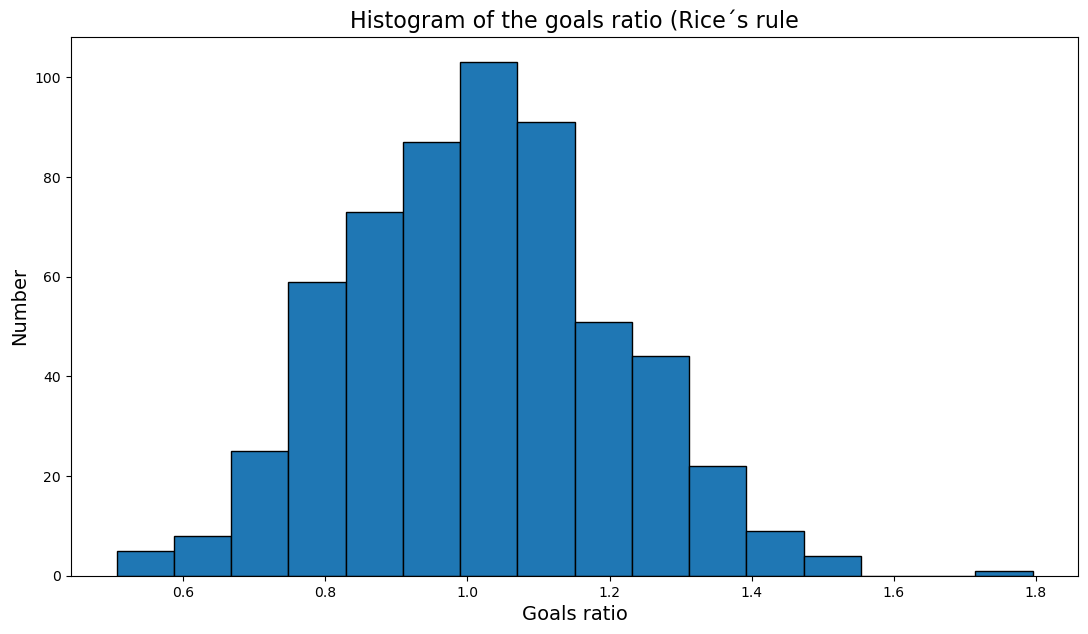

In [165]:
plt.figure(figsize=(13,7))
 
plt.hist(df['goals_ratio'], bins=num_bins, edgecolor='black')
plt.title('Histogram of the goals ratio (Rice´s rule', fontsize=16)
plt.xlabel('Goals ratio', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.show()

### Histogram of the variable using the square root rule

In [166]:
num_bins_root = int(np.ceil(np.sqrt(n)))

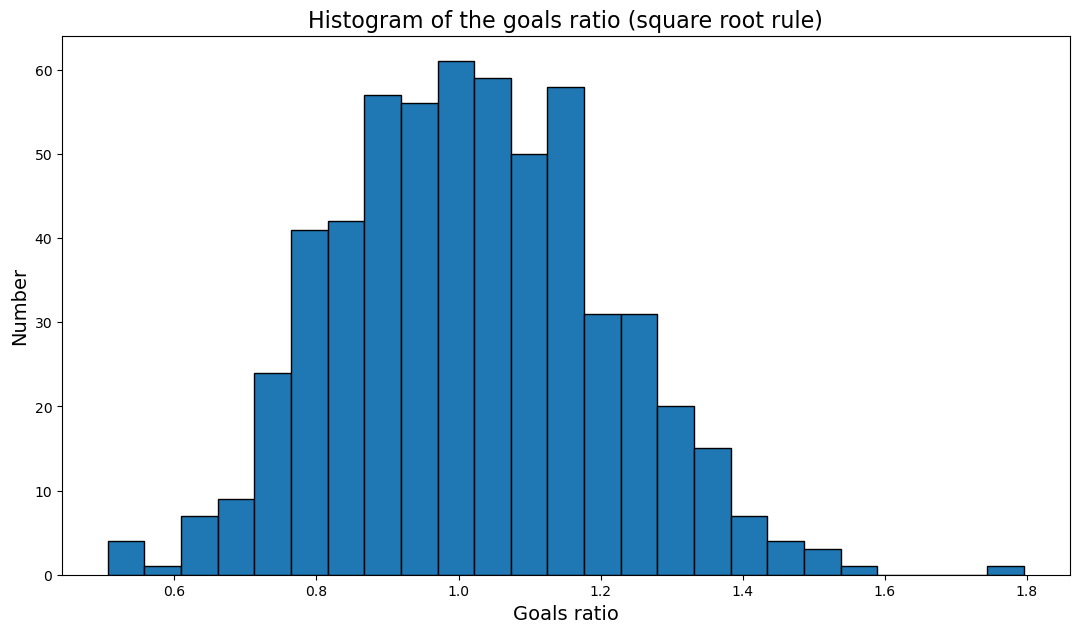

In [167]:
plt.figure(figsize=(13,7))
 
plt.hist(df['goals_ratio'], bins=num_bins_root, edgecolor='black')
plt.title('Histogram of the goals ratio (square root rule)', fontsize=16)
plt.xlabel('Goals ratio', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.show()

# `victory_percentage`

### Descriptive Statistics

In [168]:
print(f"Mean = {df['victory_percentage'].mean()}")
print(f"Median = {df['victory_percentage'].median()}")
print(f"Standard deviation = {df['victory_percentage'].std()}")
print(f"Min = {df['victory_percentage'].min()}")
print(f"Max = {df['victory_percentage'].max()}")

Mean = 0.4585189003436426
Median = 0.463
Standard deviation = 0.10223670092318188
Min = 0.119
Max = 0.756


In [169]:
df['victory_percentage'].describe()

count    582.000000
mean       0.458519
std        0.102237
min        0.119000
25%        0.390000
50%        0.463000
75%        0.534000
max        0.756000
Name: victory_percentage, dtype: float64

### Distribution

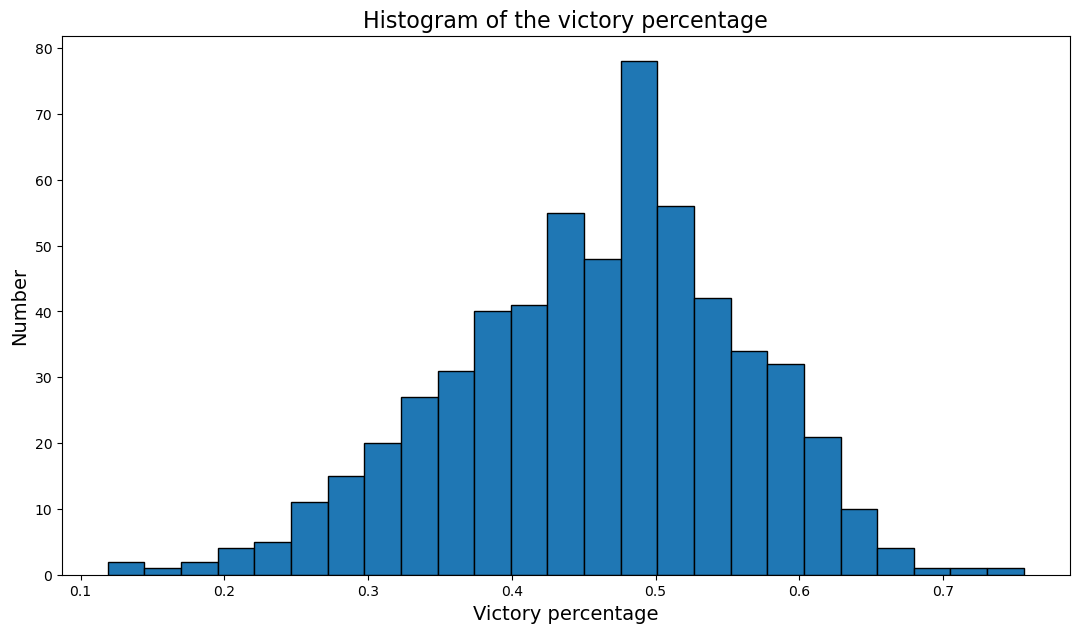

In [170]:
plt.figure(figsize=(13,7))
 
plt.hist(df['victory_percentage'], bins=25, edgecolor='black')
plt.title('Histogram of the victory percentage', fontsize=16)
plt.xlabel('Victory percentage', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.show()

# `goals_ratio` vs `victory_percentage`

## Scatterplot of Variables

In [171]:
x = df['goals_ratio']
y = df['victory_percentage']

In [189]:
slope, intercept = np.polyfit(x, y, 1)
predictions = slope * x + intercept

print(f"Slope of the line: {slope}")
print(f"Intercept: {intercept}")

Slope of the line: 0.4794281507405937
Intercept: -0.030047601151665437


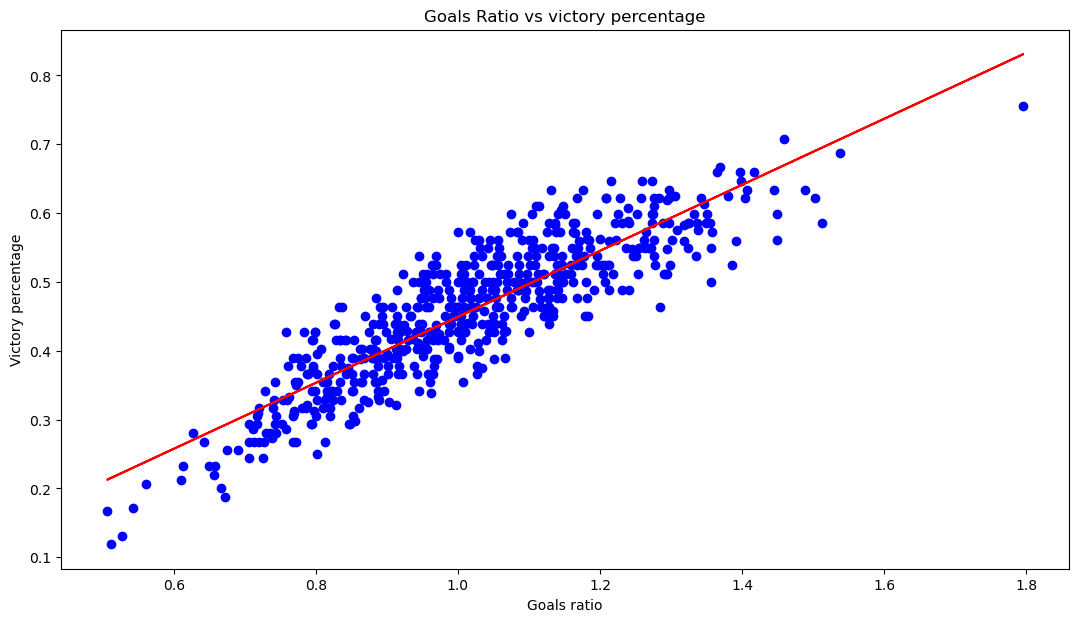

In [192]:
plt.figure(figsize=(13, 7))
plt.scatter(x, y, color='blue') 
plt.plot(x, predictions, color='red')
plt.xlabel('Goals ratio')
plt.ylabel('Victory percentage')
plt.title("Goals Ratio vs victory percentage")
plt.show()